## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs (---> Field Programmable Gate Arrays). Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/user\labcomput\data\data_000637.t

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path=r'\\wsl.localhost\Ubuntu\home\user\labcomput\data\lab5\data_000637.txt'
df=pd.read_csv(path)
N=10001
sel_df=df[:N].copy()

In [4]:
print("total original length:", len(df), '\n')
print(sel_df.head())

total original length: 1310720 

   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25


2\. Find out the number of BX in a ORBIT (the value 'x').

In [5]:
# ---> ie find maximum value of BX_COUNTER
#      (like finding how many minutes in an hour: 14h57min, 14h58min, 14h59min, 15h00min, ... 
#      therefore 59+1 minutes in an hour)
x=sel_df["BX_COUNTER"].max()+1
print(x)

3564


In [6]:
sel_df.max()

HEAD                    1
FPGA                    1
TDC_CHANNEL           139
ORBIT_CNT      3869200267
BX_COUNTER           3563
TDC_MEAS               29
dtype: int64

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [7]:
# ---> NB meaning of the assignment:
ns_in_one_orbit=x*25
first_row=df.iloc[0]
#y=len(df)-1
last_row=df.iloc[-1] # ---> NB this
#print(first_row, '\n', last_row)
total_time = (last_row["ORBIT_CNT"]-first_row["ORBIT_CNT"]) * ns_in_one_orbit + (last_row["BX_COUNTER"]-first_row["BX_COUNTER"]) * 25 + (last_row["TDC_MEAS"]-first_row["TDC_MEAS"]) * 25/30
# ---> last two terms either + or -; if in chronological order
print("Total acquisition time:", total_time, "ns, ie.", total_time/(1e9), "s") 

Total acquisition time: 980416093.3333334 ns, ie. 0.9804160933333333 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [8]:
sel_df["Absolute time (ns)"]=((ns_in_one_orbit*sel_df["ORBIT_CNT"] + 25*sel_df["BX_COUNTER"] + 25/30*sel_df["TDC_MEAS"]))

In [9]:
print(sel_df.iloc[0::1000,2:]) # ---> NB this to select by index, .loc to select by label

       TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  Absolute time (ns)
0              123  3869200167        2374        26        3.447457e+14
1000            58  3869200177        1073        12        3.447457e+14
2000            49  3869200187        2074         7        3.447457e+14
3000           139  3869200197        1240         0        3.447457e+14
4000            41  3869200207        1832        29        3.447457e+14
5000            10  3869200217        2696         3        3.447457e+14
6000            35  3869200227        2789        23        3.447457e+14
7000            49  3869200237        1053        25        3.447457e+14
8000            63  3869200247           0        19        3.447457e+14
9000            62  3869200257        1147         1        3.447457e+14
10000           50  3869200267         776        22        3.447457e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [10]:
rng=np.random.default_rng()
sel_df.iloc[1:,0]=rng.integers(low=0, high=2, size=(len(sel_df)-1)) 
print(sel_df[0::1000])

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1000      0     0           58  3869200177        1073        12   
2000      1     0           49  3869200187        2074         7   
3000      1     1          139  3869200197        1240         0   
4000      0     0           41  3869200207        1832        29   
5000      1     1           10  3869200217        2696         3   
6000      0     0           35  3869200227        2789        23   
7000      0     0           49  3869200237        1053        25   
8000      0     0           63  3869200247           0        19   
9000      0     0           62  3869200257        1147         1   
10000     0     0           50  3869200267         776        22   

       Absolute time (ns)  
0            3.447457e+14  
1000         3.447457e+14  
2000         3.447457e+14  
3000         3.447457e+14  
4000         3.447457e+14  
5000         3.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [11]:
new_sel_df=sel_df[sel_df['HEAD'] > 0]
print(new_sel_df[0:20]) # ---> NB old indices

    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0      1     0          123  3869200167        2374        26   
2      1     0           63  3869200167        2553        28   
4      1     0           64  3869200167        2760        25   
5      1     0           63  3869200167        2762         4   
6      1     0           61  3869200167        2772        14   
12     1     1            6  3869200167        2792        18   
14     1     0           56  3869200167        2789         3   
15     1     1          139  3869200167        2797         0   
19     1     0           53  3869200167        2796        26   
23     1     0           38  3869200167        2799        15   
24     1     0           58  3869200167        2795        19   
30     1     0          139  3869200167        3085         0   
31     1     0           62  3869200167        3079         4   
32     1     0           61  3869200167        3085        25   
33     1     0           

In [19]:
print(new_sel_df.iloc[-1,-1]) # ---> ok

344745743809135.8


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [12]:
first_fpga=sel_df[sel_df['FPGA']>0.5]['TDC_CHANNEL']
second_fpga=sel_df[sel_df['FPGA']<0.5]['TDC_CHANNEL']
f_counts=first_fpga.value_counts().sort_index() # ---> NB have to sort indexes
s_counts=second_fpga.value_counts().sort_index()

In [13]:
#f_hist.hist(legend=True) 

In [14]:
#s_hist.hist(legend=True)

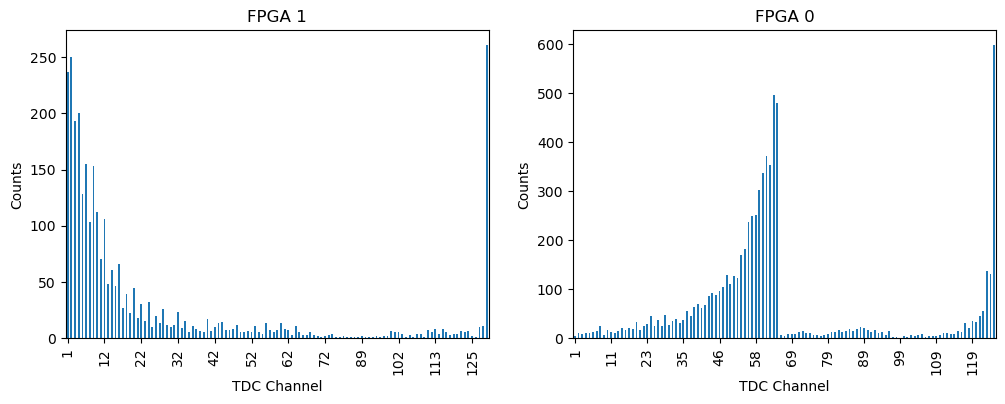

In [20]:
#---> NB all of this
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f_counts.plot(kind='bar', ax=ax1, title='FPGA 1')
s_counts.plot(kind='bar', ax=ax2, title='FPGA 0')
ax1.set_xlabel('TDC Channel')
ax1.set_ylabel('Counts')
ax2.set_xlabel('TDC Channel')
ax2.set_ylabel('Counts')
ax1.set_xticks(ax1.get_xticks()[::10])
ax2.set_xticks(ax2.get_xticks()[::10])
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [16]:
counts_table=sel_df.groupby("TDC_CHANNEL")["FPGA"].count() 
# ---> have to specify column on which to perform operation
counts=counts_table.sort_values(ascending=False)
print(counts.head(3))

TDC_CHANNEL
139    860
63     499
64     491
Name: FPGA, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [17]:
#---> "unique orbits" meaning group them by "ORBIT_CNT" value
n_unique_orbits = df['ORBIT_CNT'].nunique() # ---> NB only 2 in whole dataset
# ---> NB this method
df_fxdch=df[df['TDC_CHANNEL']==139]
n_unique_orbits_fxdch=df_fxdch['ORBIT_CNT'].nunique()
print(n_unique_orbits,'\n', n_unique_orbits_fxdch)

11001 
 10976
